https://light-tree.tistory.com/174?category=865507

# NMM (Nelder-Mead Method)

함수 f(x)의 최솟값을 구하는 문제  
임의로 N+1개의 함수값을 계산
1. Reflection
2. Expansion
3. Contraction

## Reflection
- 컨셉: 최솟값에서 가장 먼 점에서 반대방향의 점은 최솟값에 더 가까울 것이다는 가정
1. 각 점 $X_1, X_2, ..., X_{N+1}$에 대해 함수값($f_{i})$을 계산하고 오름차순으로 정렬  
    - $f_1 \le f_2 \le ... \le f_{N+1}$
2. $C$와 $X_r$을 계산
    - $C$: 가장 큰 함수값을 가지는 $X_{N+1}$을 제외한 점들의 중심점
        - $C = \frac {\sum \limits_{i=1}^{N} X_i}{N}$
    - $X_r$: 점 $X_{N+1}$의 점 $C$에 대한 대칭점
        - $X_r = C + \alpha (C - X_{N+1}),\, \alpha > 0$
        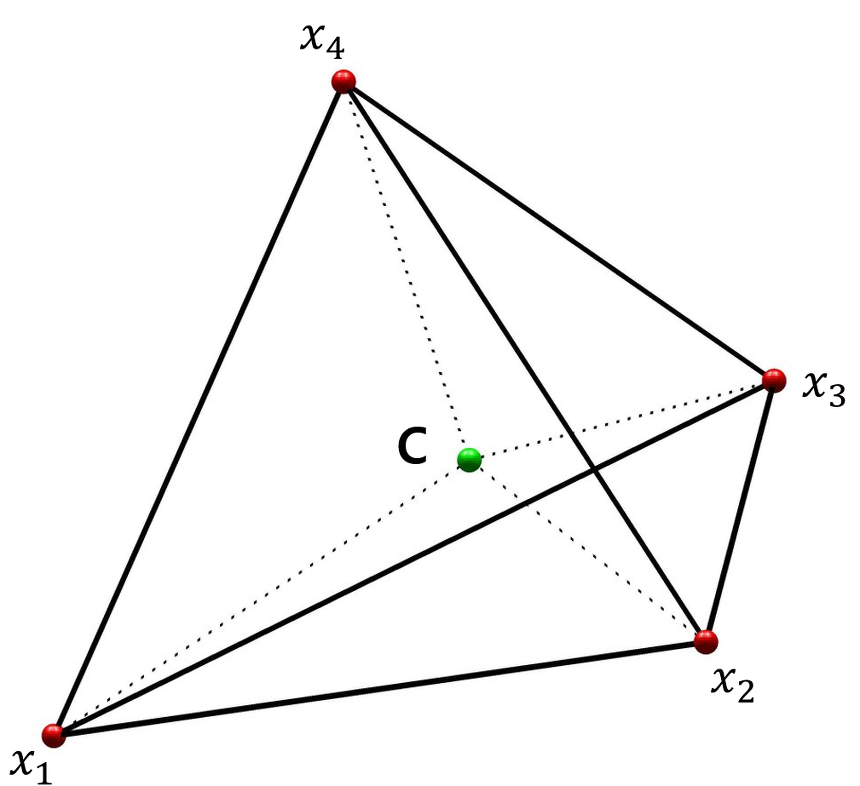
3. $X_r$에서의 함수값 $f_r$을 계산
4. `Reflection`을 반복할지, `Expansion`, `Contraction`을 할 지 분기가 나뉨
    - 만약 $f_1 \le f_r \le f_N$이면 $X_{N+1}$을 $X_r$로 바꾼 뒤 `Reflection`을 반복
    - 만약 $f_r \ge f_N$이면 `Contraction`
    - 만약 $f_r \le f_1$이면 `Expansion`

## Expansion
- 컨셉: $X_r$ 방향으로 갔더니 기존 함수값들보다 더 작은 $f_r$이 계산되었으니 조금만 더 가면 더 작은 함수값을 찾을 수 있겠다는 가정
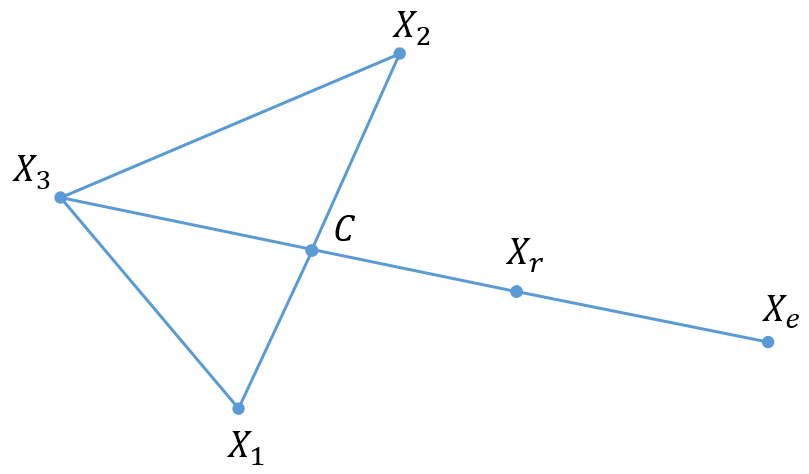
1. 새로운 $X_e$와 $f_e$를 계산하고 $f_r$과 비교
    - $X_e = C + \beta (X_r - C),\, \beta > 1$
    - 만약 $f_e \le f_r$이면 $X_{N+1}$을 $X_e$로 대체
    - 아니면 $X_{N+1}$을 $X_r$로 대체
2. `Reflection`으로 돌아감

## Contraction
- 컨셉: $X_r$ 방향으로 갔더니 기존 함수값들보다 더 큰 $f_r$이 계산되었으니/생각보다 값이 크니 덜 가면 더 작은 함수값을 찾을 수 있겠다는 가정
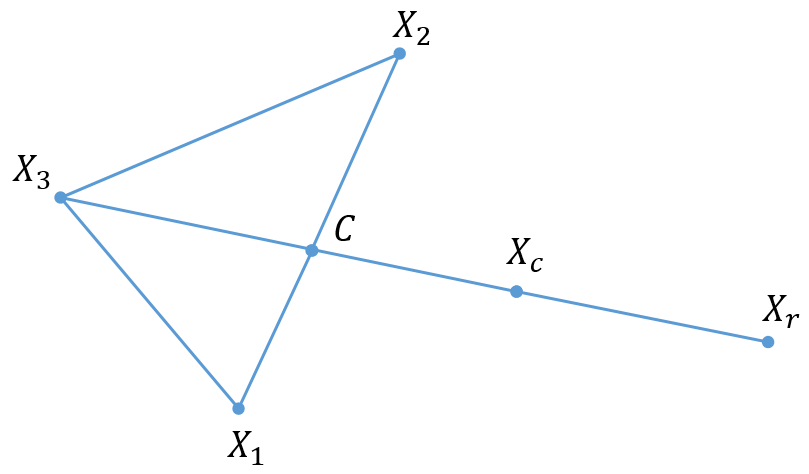  
\[Case 1\]
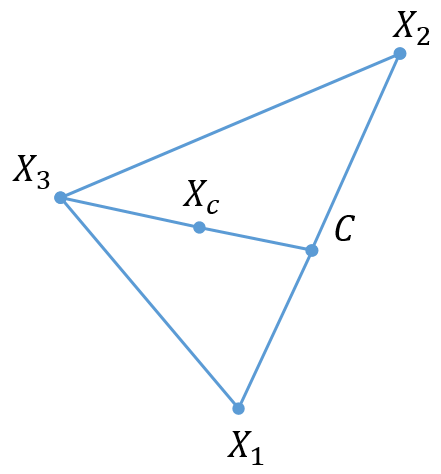
\[Case 2\]  
1. \[Case 1\] 만약 $f_N \le f_r < f_{N+1}$이면 $X_c = C + \gamma (X_r - C)$  
    \[Case 2\] 만약 $f_r > f_{N+1}$이면 $X_c = C + \gamma (X_{N+1} - C)$
    - \[Case 1\]에서 $X_{N+1}$을 제거하고 $X_r$을 업데이트, `Reflection`으로 돌아가도 되지만 비효율적이기 때문에 이 과정을 거친다.
2. $f_c$ 계산
3. 만약 $f_c < \min (f_r, f_{N+1})$이면 $X_{N+1}$을 $X_c$로 대체  
    만약 $f_c \ge \min (f_r, f_{N+1})$이면 $X_i = \frac{X_i + X_1}{2}, \, i=1, 2, ..., N+1$

## 장단점
- 실행이 쉽다.
- 메모리 사용이 적다.

- $\alpha, \beta, \gamma$를 어떻게 설정하느냐에 따라 계산 속도 차이가 있다.
- 다른 알고리즘에 비해 많은 iteration을 해야 한다.
- Stagnation(최솟값이 아닌 지점에 수렴하는 것)이 발견되면 새로운 polygon으로 알고리즘을 다시 시작해야 한다.

# 코드 구현

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def reflect(points:list, alpha=1):
    """
    points: 함수값이 오름차순으로 정리된 점 리스트, 가장 큰 값 포함
        f(p[0]) < f(p[1]) < ... < f(p[-1])
    alpha: 대칭 거리 비율
    """
    assert alpha > 0, "alpha must be greater than 0"
    
    C = np.array(points[:-1]).mean(axis=0)
    Xr = C + alpha * (C - np.array(points[-1]))
    return Xr, C

In [3]:
x3 = [0, 0]
x1 = [0.5, 2]
x2 = [2, 0.5]

xr, c = reflect([x1, x2, x3])

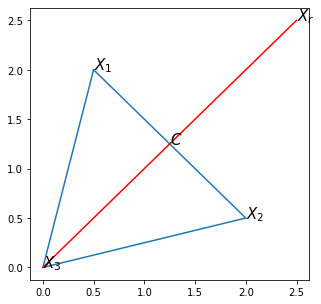

In [17]:
plt.figure(figsize=(5, 5))
plt.plot([x1[0], x2[0], x3[0], x1[0]], [x1[1], x2[1], x3[1], x1[1]])
plt.plot([x3[0], xr[0]], [x3[1], xr[1]], color='r')

plt.annotate('$X_1$', x1, size=15)
plt.annotate('$X_2$', x2, size=15)
plt.annotate('$X_3$', x3, size=15)
plt.annotate('$C$', c, size=15)
plt.annotate('$X_r$', xr, size=15)

plt.show()

In [5]:
def expanse(Xr, C, beta=2):
    assert beta > 1, "beta must be greater than 1"
    Xe = C + beta * (Xr - C)
    return Xe

In [6]:
xe = expanse(xr, c)

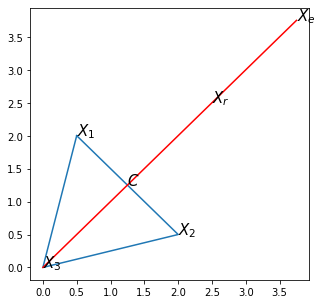

In [18]:
plt.figure(figsize=(5, 5))
plt.plot([x1[0], x2[0], x3[0], x1[0]], [x1[1], x2[1], x3[1], x1[1]])
plt.plot([x3[0], xe[0]], [x3[1], xe[1]], color='r')

plt.annotate('$X_1$', x1, size=15)
plt.annotate('$X_2$', x2, size=15)
plt.annotate('$X_3$', x3, size=15)
plt.annotate('$C$', c, size=15)
plt.annotate('$X_r$', xr, size=15)
plt.annotate('$X_e$', xe, size=15)

plt.show()

In [9]:
def contract(Xr, C, gamma=0.5):
    assert (gamma < 1) and (gamma > 0), "gamma must be greater than 0 and less than 1"
    Xc = C + gamma * (Xr - C)
    return Xc

In [14]:
xc1 = contract(xr, c)
xc2 = contract(x3, c)

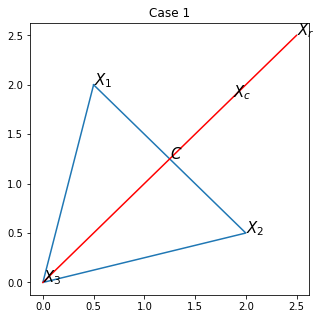

In [19]:
plt.figure(figsize=(5, 5))
plt.plot([x1[0], x2[0], x3[0], x1[0]], [x1[1], x2[1], x3[1], x1[1]])
plt.plot([x3[0], xr[0]], [x3[1], xr[1]], color='r')
plt.title('Case 1')

plt.annotate('$X_1$', x1, size=15)
plt.annotate('$X_2$', x2, size=15)
plt.annotate('$X_3$', x3, size=15)
plt.annotate('$C$', c, size=15)
plt.annotate('$X_r$', xr, size=15)
plt.annotate('$X_c$', xc1, size=15)

plt.show()

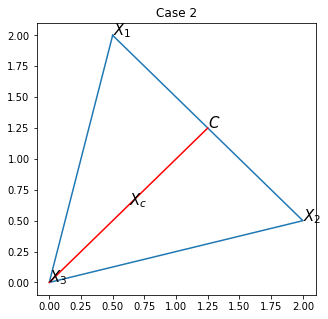

In [15]:
plt.figure(figsize=(5, 5))
plt.plot([x1[0], x2[0], x3[0], x1[0]], [x1[1], x2[1], x3[1], x1[1]])
plt.plot([x3[0], c[0]], [x3[1], c[1]], color='r')
plt.title('Case 2')

plt.annotate('$X_1$', x1, size=15)
plt.annotate('$X_2$', x2, size=15)
plt.annotate('$X_3$', x3, size=15)
plt.annotate('$C$', c, size=15)
plt.annotate('$X_c$', xc2, size=15)

plt.show()

In [52]:
def NMM(func,
        points: list,
        iters=None,
        tolerance=None,
        alpha=1,
        beta=2,
        gamma=0.5,
        feature_names=None):
    """
    func: 최솟값을 찾으려는 함수
    points: X를 찾기 위한 최초의 점
    iters: X를 찾기 위해 반복할 횟수
    tolerance: 목표 최솟값. 알고리즘을 통해 찾은 최솟값이 허용범위보다 작은지 확인하여 멈추기
        iters, tolerance 두 값 모두 주지 않으면 iters=10000으로 하여 반복
    feature_names: func이 pd.DataFrame으로 학습한 머신러닝 모델인 경우를 위한 피처 명
    """
    assert len(points) >= 3, "점은 최소 3개가 필요합니다."

    # 반복수와 허용범위를 주지 않을 경우
    if (iters is None) and (tolerance is None):
        iters = 10000
    
    # 허용범위만 주었을 경우
    if (iters is None) and (tolerance is not None):
        iters = int(10e10)
        
    if iters:
        iters = int(iters)
        
    def calc_func(point):
        try:
            f = func(point)
        except:
            f = func(pd.DataFrame(point, columns=feature_names))[0]
        return f

    for i in range(iters):
        # 점마다 함수값 계산 후 오름차순 정렬
        fs = [(point, calc_func(point)) for point in points]
        fs = sorted(fs, key=lambda x: x[1])

        # 점들만 추출
        points = [point for point, _ in fs]

        # Xr 계산
        Xr, C = reflect(points, alpha=alpha)

        # fr 계산
        fr = calc_func(Xr)
        
        # 분기 (1) - Reflection
        if fr >= fs[0][-1] and fr <= fs[-2][-1]:
            points[-1] = Xr
            continue
            
        # 분기 (2) - Expansion
        elif fr < fs[0][-1]:
            Xe = expanse(Xr, C)
            fe = calc_func(Xe)
            
            if fe <= fr:
                points[-1] = Xe
            else:
                points[-1] = Xr
            
            continue
            
        # 분기 (3) - Contraction
        else:
            # Case 1
            if fr < fs[-1][-1]:
                Xc = contract(Xr, C)
            else:
                Xc = contract(points[-1], C)
            
            fc = calc_func(Xc)
            
            if fc < min(fr, fs[-1][-1]):
                points[-1] = Xc
            else:
                x1 = points[0]
                points = [(xi+x1)/2 for xi in points]
        
        # tolerance 확인
        if (tolerance is not None) and (fs[0][-1] <= tolerance):
            break
                
    return {'minimum':fs[0][-1], 'min_point':points[0], 'iter':i+1}

In [46]:
def f1(x):
    return (x - 2) ** 2 + 2

In [47]:
NMM(f1, [-1, -5, 7], iters=100)

{'minimum': 2.0, 'min_point': 2.0, 'iter': 100}

In [48]:
NMM(f1, [-1, -5, 7], tolerance=2)

{'minimum': 2.0, 'min_point': 2.0, 'iter': 7}

In [49]:
def f2(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

In [50]:
NMM(f2, [(-3, 5), (-2, -2), (5, 9)], iters=100)

{'minimum': 1.1541665062084073e-09,
 'min_point': array([1.00003192, 1.00006267]),
 'iter': 100}

In [51]:
NMM(f2, [(-3, 5), (-2, -2), (5, 9)], iters=100000)

{'minimum': 1.232595164407831e-32,
 'min_point': array([1., 1.]),
 'iter': 100000}

In [53]:
def f_global(x):
    """비선형 목적함수"""
    return x**2 - 20 * np.cos(x)

In [58]:
NMM(f_global, [3.5, 5, 10], iters=100)

{'minimum': -20.0, 'min_point': 0.0, 'iter': 100}

In [59]:
NMM(f_global, [3.5, 5, 10], tolerance=-20)

{'minimum': -20.0, 'min_point': 0.0, 'iter': 3}

In [65]:
NMM(f_global, [3.5, 5, 10], iters=500, alpha=0.5)

{'minimum': -20.0, 'min_point': 4.042447300232321e-09, 'iter': 500}

In [71]:
NMM(f_global, [3.5, 5, 10], iters=500, alpha=0.1, beta=1.5, gamma=0.9)

{'minimum': 19.276974133237275, 'min_point': 5.005436196590557, 'iter': 500}

# 자전거 수요 예측

In [72]:
df = pd.read_csv('bike.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [73]:
df['datetime'] = df.datetime.apply(pd.to_datetime)

df['year'] = df.datetime.apply(lambda x : x.year)
df['month'] = df.datetime.apply(lambda x : x.month)
df['day'] = df.datetime.apply(lambda x : x.day)
df['hour'] = df.datetime.apply(lambda x : x.hour)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [74]:
drop_columns = ['datetime', 'casual', 'registered']
df.drop(drop_columns, axis=1, inplace=True)

In [75]:
y_target = df['count']
X_features = df.drop(['count'], axis=1)

In [77]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_features, y_target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
def fitness(indivisual, model=xgb, goal=800):
    y = np.array([indivisual]).reshape(1,-1)

    pred = model.predict(y)[0]
    
    score = abs(pred - goal)
    
    return score

In [88]:
NMM(fitness, [X_features.iloc[i*100] for i in range(100)], iters=1000)

{'minimum': 0.27227783203125,
 'min_point': array([3.58092438e+00, 9.67582072e-03, 1.23530820e+00, 1.32736866e+00,
        3.29066462e+01, 3.77019899e+01, 6.98051139e+01, 6.94550576e+00,
        2.01209567e+03, 1.03465981e+01, 7.83001797e+00, 1.78437882e+01]),
 'iter': 1000}

In [99]:
min_point = pd.DataFrame([[
    3.58092438e+00, 9.67582072e-03, 1.23530820e+00, 1.32736866e+00,
    3.29066462e+01, 3.77019899e+01, 6.98051139e+01, 6.94550576e+00,
    2.01209567e+03, 1.03465981e+01, 7.83001797e+00, 1.78437882e+01
]],
                         columns=X_features.columns)
min_point

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,3.580924,0.009676,1.235308,1.327369,32.906646,37.70199,69.805114,6.945506,2012.09567,10.346598,7.830018,17.843788


In [101]:
xgb.predict(pd.DataFrame([[4, 0, 1, 1, 32.91, 37.702, 70, 6.9455, 2012, 10, 8, 18]], columns=X_features.columns))

array([800.2723], dtype=float32)

In [97]:
X_features

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,19,22


# scipy 이용

In [102]:
from scipy.optimize import fmin

fmin(f1, 0)

Optimization terminated successfully.
         Current function value: 2.000000
         Iterations: 27
         Function evaluations: 54


array([2.])

In [103]:
fmin(f2, (-1, -1))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 67
         Function evaluations: 125


array([0.99999886, 0.99999542])

In [104]:
fmin(f_global, 4)

Optimization terminated successfully.
         Current function value: 15.791737
         Iterations: 16
         Function evaluations: 32


array([5.67919922])

In [105]:
fmin(f_global, 1)

Optimization terminated successfully.
         Current function value: -20.000000
         Iterations: 17
         Function evaluations: 34


array([-8.8817842e-16])

In [106]:
fmin(fitness, X_features.iloc[5000])

Optimization terminated successfully.
         Current function value: 618.781128
         Iterations: 43
         Function evaluations: 318


array([4.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 1.23000e+01,
       1.43950e+01, 7.50000e+01, 1.50013e+01, 2.11155e+03, 1.20000e+01,
       2.00000e+00, 1.00000e+01])

In [107]:
min_point = pd.DataFrame([[4.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 1.23000e+01,
       1.43950e+01, 7.50000e+01, 1.50013e+01, 2.11155e+03, 1.20000e+01,
       2.00000e+00, 1.00000e+01]],
                         columns=X_features.columns)
min_point

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,4.0,0.0,1.0,1.0,12.3,14.395,75.0,15.0013,2111.55,12.0,2.0,10.0


In [109]:
xgb.predict(min_point)

array([181.21887], dtype=float32)